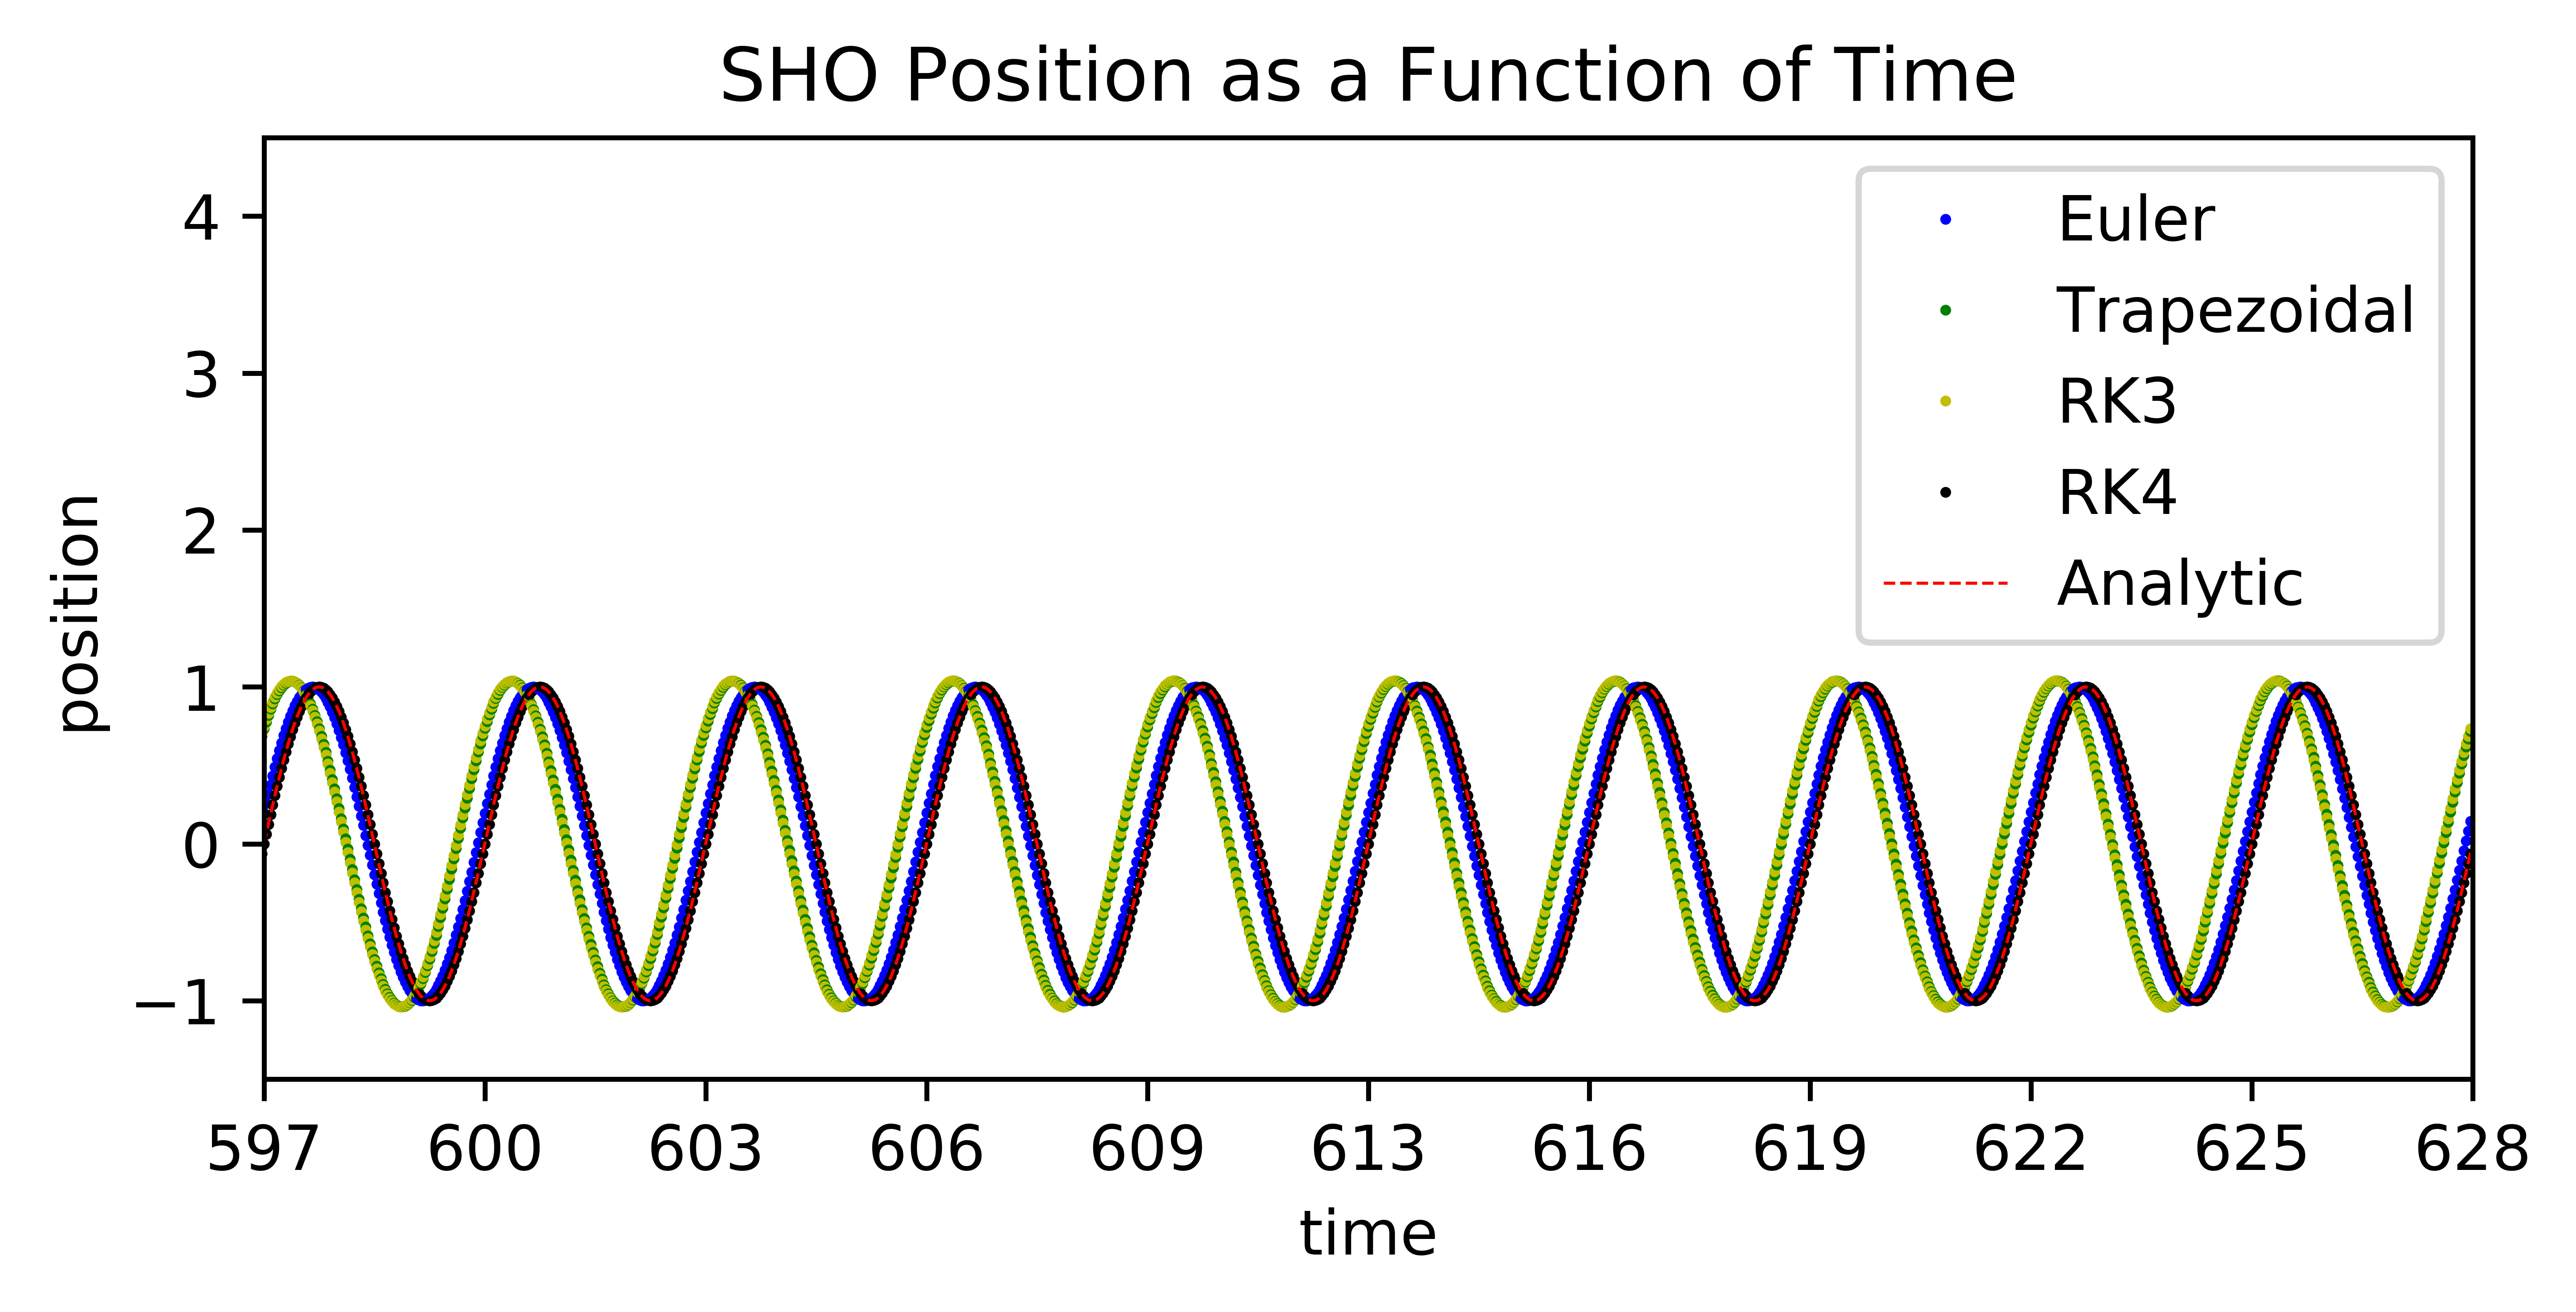

In [28]:
#simulate and plot the motion of simple harmonic oscillator
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[6.4,2.8],dpi=1000);
#declare initial conditions
omega=2.0;
v_ini=omega;
x_ini=0;
T=2*np.pi/omega;
t_fi=200*T;
dt=1e-2*T;
i = 0;
t=0;
x = x_ini;
x_T = x_ini;
x_R3 = x_ini;
x_R4 = x_ini;
v = v_ini;
v_T = v_ini;
v_R3 = v_ini;
v_R4 = v_ini;
#
#do loop
while t<=t_fi:
    line1,=plt.plot(t,x,'b.',markersize=1.5);
    line2,=plt.plot(t,x_T,'g.',markersize=1.5);
    line3,=plt.plot(t,x_R3,'y.',markersize=1.5);
    line4,=plt.plot(t,x_R4,'k.',markersize=1.5);
#Euler method    
    v+=-omega**2*x*dt;
    x+=v*dt;
#    
#trapezoidal integral
    fv0=-omega**2*x_T;
    fx0=v_T;
    fv1=-omega**2*(x_T+fx0*dt);
    fx1=v_T+fv0*dt;
    v_T+=0.5*dt*(fv0+fv1);
    x_T+=0.5*dt*(fx0+fx1);
#
#RK3
    fv0=-omega**2*x_R3;
    fx0=v_R3;
    fV1=-omega**2*(x_R3+fx0*2/3*dt);
    fx1=v_R3+fv0*2/3*dt;
    v_R3+=1/4*dt*(fv0+3*fv1);
    x_R3+=1/4*dt*(fx0+3*fx1);
#
#RK4
    fv0=-omega**2*x_R4;
    fx0=v_R4;
    fv1=-omega**2*(x_R4+fx0*0.5*dt);
    fx1=v_R4+fv0*0.5*dt;
    fv2=-omega**2*(x_R4+fx1*0.5*dt);
    fx2=v_R4+fv1*0.5*dt;
    fv3=-omega**2*(x_R4+fx2*dt);
    fx3=v_R4+fv2*dt;    
    v_R4+=1/6*dt*(fv0+2*fv1+2*fv2+fv3);
    x_R4+=1/6*dt*(fx0+2*fx1+2*fx2+fx3);
#
    t+=dt;
    i+=1;
#
#analyatic solution
t=np.linspace(0,t_fi,i);
x=np.sin(omega*t);
linef,=plt.plot(t,x,'r--',linewidth=0.5);
#
#plotting
plt.xlabel('time');
plt.ylabel('position');
plt.legend(handles = [line1, line2, line3, line4, linef], labels = ['Euler','Trapezoidal', 'RK3','RK4','Analytic'], loc = 'upper right');
plt.title('SHO Position as a Function of Time');
plt.xticks(np.arange(0, t_fi*T, step=2*np.pi/omega));
#select the time interval to see the difference between each method
plt.xlim(t_fi-10*2*np.pi/omega,t_fi);
#plt.xlim(0,t_fi);
plt.ylim(-1.5,4.50);
plt.show()

In [1]:
!jupyter nbconvert SHO_Motion.ipynb --to html

[NbConvertApp] Converting notebook SHO_Motion.ipynb to html
[NbConvertApp] Writing 1192927 bytes to SHO_Motion.html
